In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
pd.set_option('display.max_columns', 40)

C:\Users\Swakshwar Ghosh\AppData\Local\Temp\ipykernel_15484\176486943.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
data1 = pd.read_csv('dataset/Customer_DF.csv')
data2 = pd.read_csv('dataset/cust_transaction_details.csv')

In [3]:
data1.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [4]:
data1.shape ,data2.shape

((168, 10), (623, 11))

In [5]:
data1.duplicated().any()

False

In [6]:
data2.duplicated().any()

False

In [7]:
data1.isna().any()

Unnamed: 0                False
customerEmail             False
customerPhone             False
customerDevice            False
customerIPAddress         False
customerBillingAddress    False
No_Transactions           False
No_Orders                 False
No_Payments               False
Fraud                     False
dtype: bool

In [8]:
data2.isna().any()

Unnamed: 0                          False
customerEmail                       False
transactionId                       False
orderId                             False
paymentMethodId                     False
paymentMethodRegistrationFailure    False
paymentMethodType                   False
paymentMethodProvider               False
transactionAmount                   False
transactionFailed                   False
orderState                          False
dtype: bool

In [9]:
data1['customerEmail'].nunique() , data2['customerEmail'].nunique()

(161, 136)

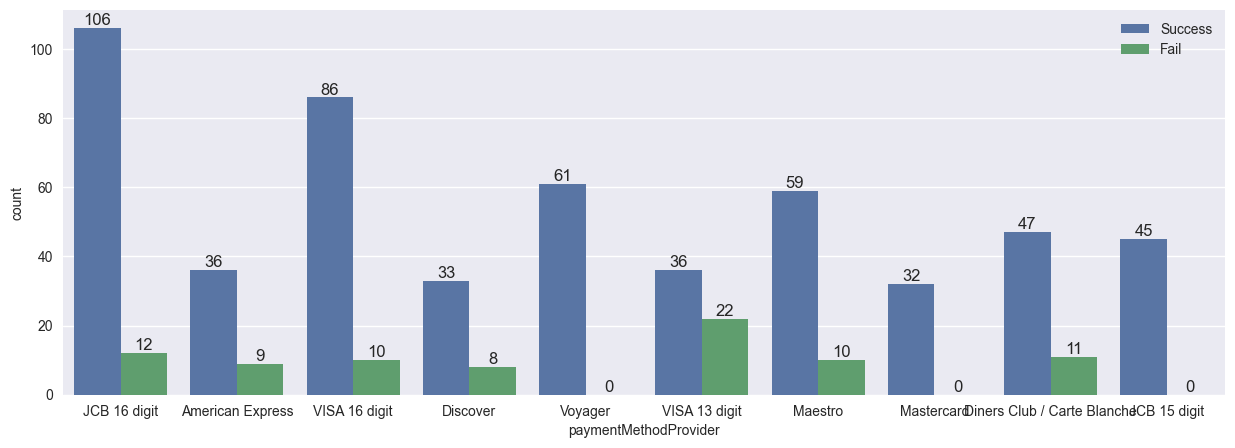

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x='paymentMethodProvider',hue = 'paymentMethodRegistrationFailure',data=data2)
plt.legend (['Success','Fail'])
ax = plt.gca()

for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x()+0.2, p.get_y() + height, '%d' % height, 
            fontsize=12, ha='center', va='bottom')
plt.show()

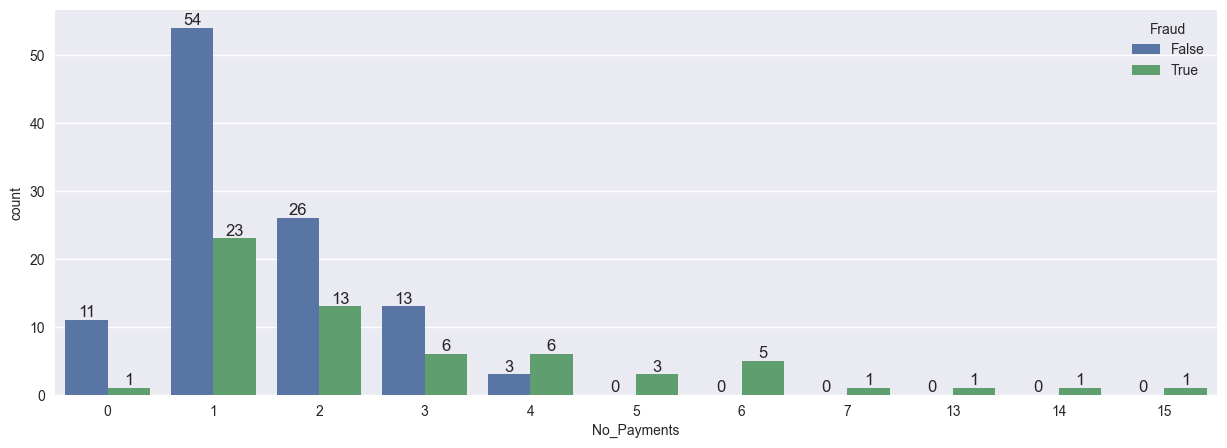

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'No_Payments',hue = 'Fraud',data=data1)
ax = plt.gca()
for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x()+0.2, p.get_y() + height, '%d' % height, 
            fontsize=12, ha='center', va='bottom')
plt.show()

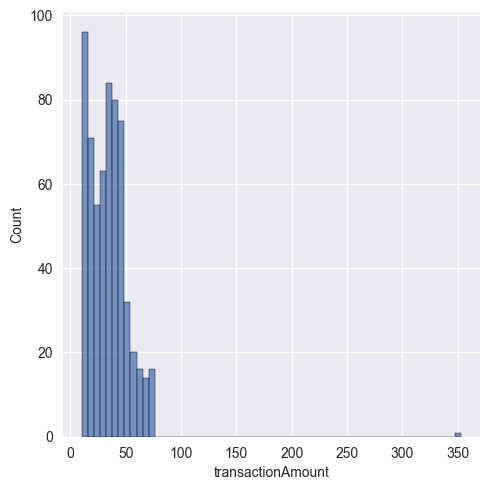

In [17]:
sns.displot(data2['transactionAmount'])

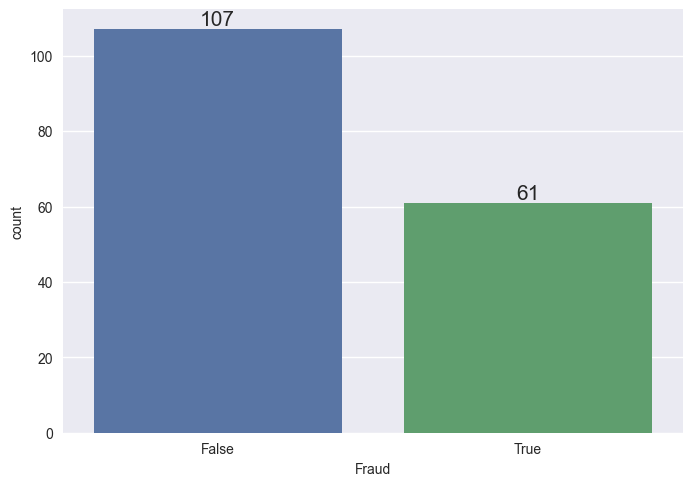

In [18]:
sns.countplot(x= 'Fraud',data=data1)
ax = plt.gca()
for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x()+0.4, p.get_y() + height, '%d' % height, 
            fontsize=15, ha='center', va='bottom')
plt.show()

In [19]:
final = data1[data1['customerEmail'].isin(data2['customerEmail'])== True].reset_index(drop=True)
final.shape

(143, 10)

In [20]:
final.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [21]:
final.drop('Unnamed: 0',axis = 1, inplace = True)

In [22]:
No_transactionsFail = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            s += data2['transactionFailed'][j]
    No_transactionsFail.append(s)
final['No_transactionsFail'] = No_transactionsFail

In [23]:
Total_transaction_amt = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            s += data2['transactionAmount'][j]
    Total_transaction_amt.append(s)   
final['Total_transaction_amt'] = Total_transaction_amt

In [24]:
paymentRegFailure = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            s += data2['paymentMethodRegistrationFailure'][j]
    paymentRegFailure.append(s)   
final['PaymentRegFail'] = paymentRegFailure

In [25]:
def col_make(column_name,category):
    array = []
    for i in range(0,143):
        s=0
        for j in range(0,623):
            if(final['customerEmail'][i]==data2['customerEmail'][j]):
                if data2[column_name][j]==category:
                    s+=1
        array.append(s)
    return array 

In [26]:
PaypalPayments = col_make('paymentMethodType','paypal')
ApplePayments = col_make('paymentMethodType','apple pay')
BitcoinPayments = col_make('paymentMethodType','bitcoin')
CardPayments = col_make('paymentMethodType','card')

final['PaypalPayments']= PaypalPayments
final['ApplePayments']= ApplePayments
final['CardPayments']= CardPayments
final['BitcoinPayments']= BitcoinPayments

In [27]:
OrdersFulfilled = col_make('orderState','fulfilled')
OrdersFailed =  col_make('orderState','failed')
OrdersPending = col_make('orderState','pending')

final['OrdersFulfilled'] = OrdersFulfilled
final['OrdersPending'] = OrdersPending
final['OrdersFailed'] = OrdersFailed

In [28]:
JCB_16 = col_make('paymentMethodProvider','JCB 16 digit')
AmericanExp = col_make('paymentMethodProvider','American Express')
VISA_16 =  col_make('paymentMethodProvider','VISA 16 digit')
Discover =  col_make('paymentMethodProvider','Discover')
Voyager = col_make('paymentMethodProvider','Voyager')
VISA_13 = col_make('paymentMethodProvider','VISA 13 digit')
Maestro = col_make('paymentMethodProvider','Maestro')
Mastercard = col_make('paymentMethodProvider','Mastercard')
DC_CB =col_make('paymentMethodProvider','Diners Club / Carte Blanche')
JCB_15= col_make('paymentMethodProvider','JCB 15 digit')

final['JCB_16'] = JCB_16
final['AmericanExp'] = AmericanExp 
final['VISA_16'] = VISA_16 
final['Discover'] = Discover
final['Voyager'] = Voyager 
final['VISA_13'] = VISA_13
final['Maestro'] = Maestro 
final['Mastercard'] = Mastercard
final['DC_CB'] = DC_CB 
final['JCB_15'] = JCB_15


In [29]:
Trns_fail_order_fulfilled = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==data2['customerEmail'][j]):
            if (data2['orderState'][j]=='fulfilled') & (data2['transactionFailed'][j]==1):
                s+=1
    Trns_fail_order_fulfilled.append(s)
final['Trns_fail_order_fulfilled'] = Trns_fail_order_fulfilled

In [30]:
final.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,No_transactionsFail,Total_transaction_amt,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,OrdersFulfilled,OrdersPending,OrdersFailed,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,0,44,2,0,0,2,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,1,111,1,0,0,0,3,3,0,0,0,2,1,0,0,0,0,0,0,0,1
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,2,131,0,0,0,5,0,4,0,1,4,0,0,1,0,0,0,0,0,0,2
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,0,85,0,0,0,3,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,2,411,0,0,3,4,0,6,0,1,3,1,2,0,0,1,0,0,0,0,2


In [31]:
Duplicate_IP = []
for i in range(0,143):
    s=0
    for j in range(0,143):
        if(final['customerIPAddress'][i]==final['customerIPAddress'][j]):
            s+=1
    s-=1        
    Duplicate_IP.append(s)
final['Duplicate_IP'] = Duplicate_IP

In [32]:
Duplicate_Address = []
for i in range(0,143):
    s=0
    for j in range(0,143):
        if(final['customerBillingAddress'][i]==final['customerBillingAddress'][j]):
            s+=1
    s-=1        
    Duplicate_Address.append(s)
final['Duplicate_Address']=Duplicate_Address

In [33]:
final = pd.get_dummies(final,columns=['Fraud'],prefix=['Fraud'],drop_first=True)
final = final.rename(columns={"Fraud_True": "Fraud"})
final.head()

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,No_transactionsFail,Total_transaction_amt,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,OrdersFulfilled,OrdersPending,OrdersFailed,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Duplicate_Address,Fraud
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,44,2,0,0,2,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,111,1,0,0,0,3,3,0,0,0,2,1,0,0,0,0,0,0,0,1,0,0,1
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,2,131,0,0,0,5,0,4,0,1,4,0,0,1,0,0,0,0,0,0,2,0,0,0
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,0,85,0,0,0,3,0,3,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,2,411,0,0,3,4,0,6,0,1,3,1,2,0,0,1,0,0,0,0,2,0,0,1


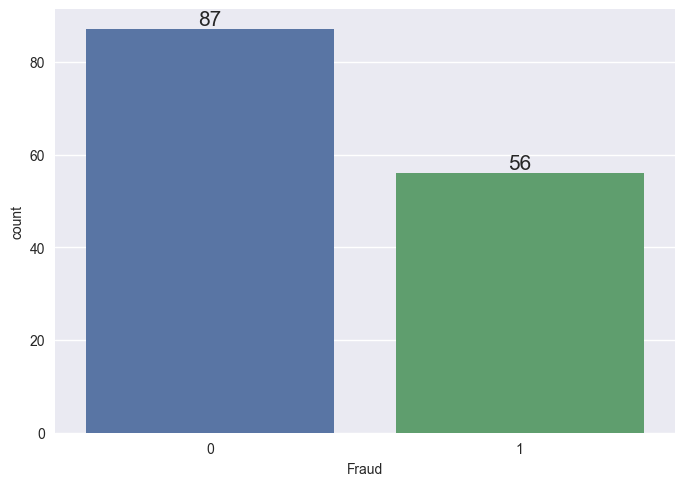

In [34]:
sns.countplot(x= 'Fraud',data=final)
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x()+0.4, p.get_y() + height, '%d' % height, 
            fontsize=15, ha='center', va='bottom')
plt.show()

In [35]:
final[final['Duplicate_IP']>0]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,No_transactionsFail,Total_transaction_amt,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,OrdersFulfilled,OrdersPending,OrdersFailed,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Duplicate_Address,Fraud
39,jamescampbell@randall-pacheco.biz,599-142-6783,eaul63h9guyvwuymfn3z,45.203.99.249,"29408 Lisa Lock\nPort Jennifer, LA 26501-7040",7,3,2,4,146,0,0,0,7,0,7,0,0,0,0,0,5,0,2,0,0,0,0,4,3,0,1
67,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,0,117,2,0,1,3,0,4,0,0,0,2,0,0,1,1,0,0,0,0,0,3,2,1
73,shelby24@hotmail.com,(071)934-3315x27613,obb41ux0zfa2td5ajo9s,45.203.99.249,"3271 Cynthia Groves\nPort Jeremyberg, CO 27305",5,4,2,1,192,3,0,0,5,0,3,0,2,0,0,0,0,0,0,0,2,3,0,0,3,0,1
118,christinemills@mcgee.com,(651)355-4709,zbn9it3s7yl69bjtrnqf,45.203.99.249,"5156 Greene Park Apt. 748\nNew Sandra, CA 1480...",5,5,2,0,125,0,2,0,3,0,4,0,1,0,0,0,0,5,0,0,0,0,0,0,3,0,1


In [36]:
final[final['Duplicate_Address']>0]

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,No_transactionsFail,Total_transaction_amt,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,OrdersFulfilled,OrdersPending,OrdersFailed,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Duplicate_Address,Fraud
47,feliciabrown@gmail.com,(226)129-2677,z7xkuohhjbtiqs6q9rk9,115.137.171.103,49680 Brian Squares Apt. 122\nPort Walterburgh...,1,1,1,0,41,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1
67,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,0,117,2,0,1,3,0,4,0,0,0,2,0,0,1,1,0,0,0,0,0,3,2,1
75,brittanydean@hotmail.com,06238721842,yq8xiivmx4prlgx0gofo,3517:8e52:885:8640:a59:f5fd:cb33:b06a,49680 Brian Squares Apt. 122\nPort Walterburgh...,6,4,1,2,202,0,0,0,6,0,6,0,0,0,0,0,0,6,0,0,0,0,0,2,0,2,1


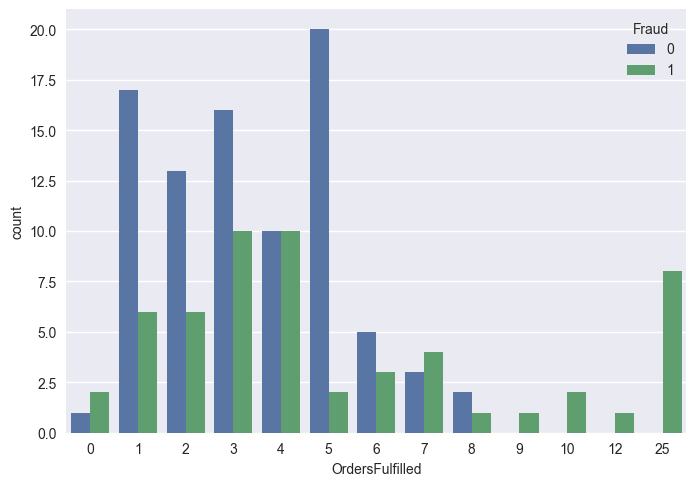

In [37]:
sns.countplot(x = final['OrdersFulfilled'], hue = final['Fraud'])
plt.show()

C:\Users\Swakshwar Ghosh\AppData\Local\Temp\ipykernel_15484\2962561129.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final.corr()


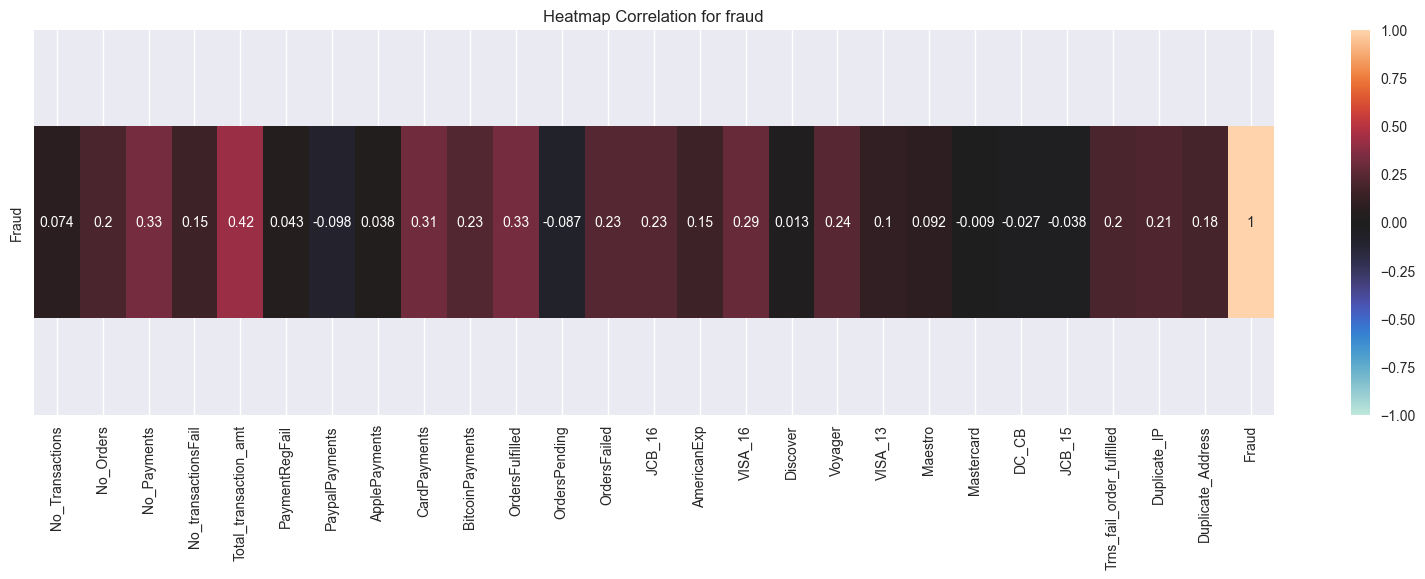

In [38]:
corr = final.corr()
corr2 = corr.iloc[-1:,:]

plt.figure(figsize=(20, 5))
ax = sns.heatmap(corr2, annot=True, vmin=-1, vmax=1, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap Correlation for fraud')
plt.show()

In [39]:
x = final.drop(['customerEmail','customerPhone', 'customerDevice', 'customerIPAddress',
       'customerBillingAddress','Fraud'], axis=1)
y = final['Fraud']

In [40]:
from sklearn.model_selection import train_test_split


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [42]:
x_train.shape

(114, 26)

In [43]:
x_test.shape


(29, 26)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [46]:
Lr_model = LogisticRegression(solver='liblinear')
Lr_model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [47]:
y_pred_lr= Lr_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.73      0.73      0.73        11

    accuracy                           0.79        29
   macro avg       0.78      0.78      0.78        29
weighted avg       0.79      0.79      0.79        29



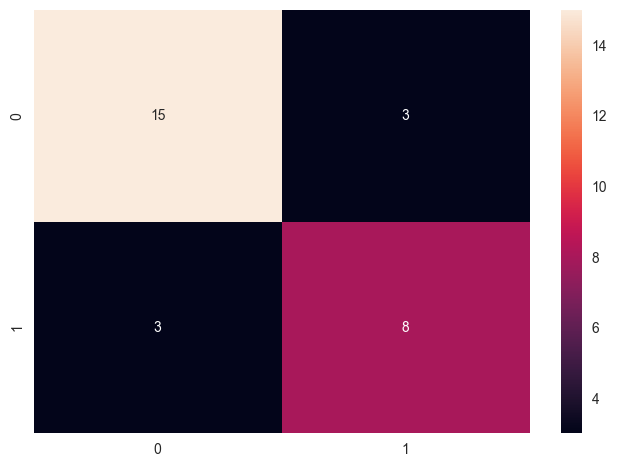

In [48]:
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot = True)
plt.show()

In [49]:
test_error_rate=[]
for k in range(1,30):
    knn_midel=KNeighborsClassifier(n_neighbors=k)
    knn_midel.fit(x_train,y_train)
    y_p_test=knn_midel.predict(x_test)
    test_error=1-accuracy_score(y_test,y_p_test)
    test_error_rate.append(test_error)

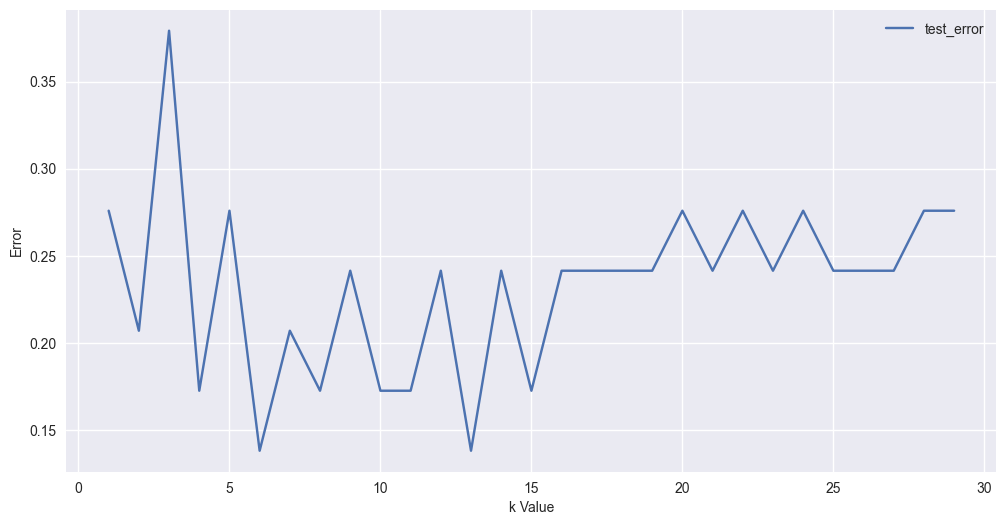

In [50]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),test_error_rate,label='test_error')
plt.legend()
plt.xlabel('k Value')
plt.ylabel('Error')
plt.show()

In [51]:
knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model = knn_model.fit(x_train,y_train)

In [52]:
y_pred_knn = knn_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        18
           1       1.00      0.64      0.78        11

    accuracy                           0.86        29
   macro avg       0.91      0.82      0.84        29
weighted avg       0.89      0.86      0.85        29



<Axes: >

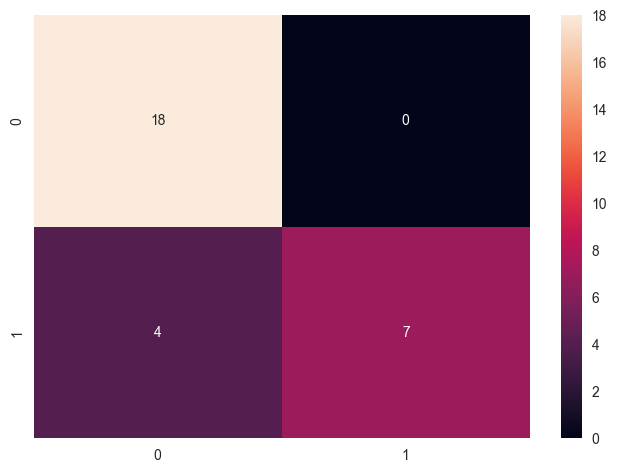

In [53]:
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot = True)

In [54]:
svc = SVC()
svc = svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       1.00      0.55      0.71        11

    accuracy                           0.83        29
   macro avg       0.89      0.77      0.79        29
weighted avg       0.87      0.83      0.81        29



<Axes: >

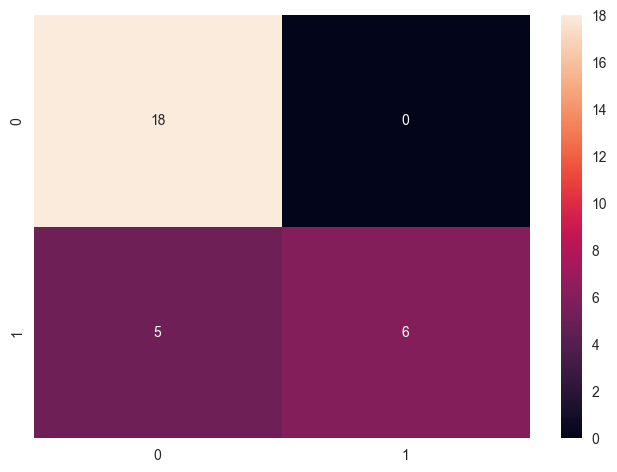

In [55]:
print(classification_report(y_test, y_pred_svc))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot = True)

In [56]:
model_rf = RandomForestClassifier()
model_rf = model_rf.fit(x_train, y_train)
y_pred_rd = model_rf.predict(x_test)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.73      0.73      0.73        11

    accuracy                           0.79        29
   macro avg       0.78      0.78      0.78        29
weighted avg       0.79      0.79      0.79        29



<Axes: >

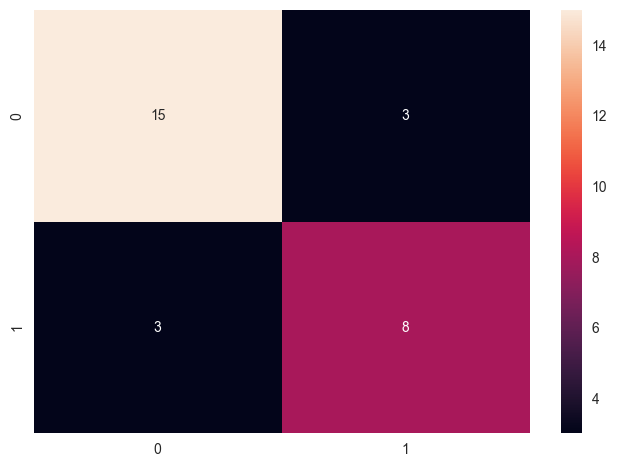

In [57]:
print(classification_report(y_test, y_pred_rd))
sns.heatmap(confusion_matrix(y_test, y_pred_rd), annot = True)

In [58]:
accuracy, precision, recall, roc = [],[],[],[]
predictions = [y_pred_rd,y_pred_knn,y_pred_svc,y_pred_lr]

               
for i in range (len(predictions)):
    accuracy.append(accuracy_score(y_test, predictions[i]))
    precision.append(precision_score(y_test, predictions[i]))
    recall.append(recall_score(y_test, predictions[i]))
    roc.append(roc_auc_score(y_test, predictions[i]))

compare = pd.DataFrame ({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC_score':roc}, index=['rf','knn',"svm",'lr'])
compare.sort_values('Accuracy', ascending=False)

,Accuracy,Precision,Recall,ROC_score
knn,0.862069,1.000000,0.636364,0.818182
svm,0.827586,1.000000,0.545455,0.772727
rf,0.793103,0.727273,0.727273,0.780303
lr,0.793103,0.727273,0.727273,0.780303


In [59]:
model_params = {
     'svm': {
        'model': SVC(),
        'params' : {
            'C' : [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'kernel': ['rbf'],
            'gamma' : ['scale', 'auto']
        }  
    },
    'knn': {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [i for i in range(1,50,1)],
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'n_jobs' : [-1]   
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [i for i in range(1,100,5)],
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'n_jobs' : [-1]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class' : ['auto', 'ovr', 'multinomial'],
            'n_jobs' : [-1]
        }
    }
}

In [60]:
%%time
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
data = pd.DataFrame(scores,columns=['model','best_score','best_params'])
data

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

CPU times: total: 18.6 s
Wall time: 5min 52s


C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
780 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Swakshwar Ghosh\AppData\Roaming\P

,model,best_score,best_params
0,svm,0.710672,"{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}"
1,knn,0.718972,"{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbo..."
2,random_forest,0.798814,"{'criterion': 'entropy', 'max_features': 'log2..."
3,logistic_regression,0.754941,"{'C': 2.0, 'multi_class': 'auto', 'n_jobs': -1..."


In [61]:
%%time
scores = []

for model_name, mp in model_params.items():
    clf_random =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf_random.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf_random.best_score_,
        'best_params': clf_random.best_params_
    })
    
data1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
data1

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly 

CPU times: total: 1 s
Wall time: 8.05 s


C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(
C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python31

,model,best_score,best_params
0,svm,0.710672,"{'kernel': 'rbf', 'gamma': 'scale', 'C': 10.0}"
1,knn,0.701581,"{'weights': 'distance', 'n_neighbors': 26, 'n_..."
2,random_forest,0.789723,"{'n_jobs': -1, 'n_estimators': 56, 'max_featur..."
3,logistic_regression,0.728854,"{'solver': 'liblinear', 'penalty': 'l2', 'n_jo..."


In [62]:
model = RandomForestClassifier(n_jobs = -1, n_estimators = 16, max_features = 'auto', criterion = 'gini')

In [63]:
model.fit(x_train, y_train)

C:\Users\Swakshwar Ghosh\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=16, n_jobs=-1)

In [64]:
importance = model.feature_importances_

In [65]:
columns = list(x.columns)
columns

['No_Transactions',
 'No_Orders',
 'No_Payments',
 'No_transactionsFail',
 'Total_transaction_amt',
 'PaymentRegFail',
 'PaypalPayments',
 'ApplePayments',
 'CardPayments',
 'BitcoinPayments',
 'OrdersFulfilled',
 'OrdersPending',
 'OrdersFailed',
 'JCB_16',
 'AmericanExp',
 'VISA_16',
 'Discover',
 'Voyager',
 'VISA_13',
 'Maestro',
 'Mastercard',
 'DC_CB',
 'JCB_15',
 'Trns_fail_order_fulfilled',
 'Duplicate_IP',
 'Duplicate_Address']

In [67]:
df_imp = pd.DataFrame({'columns' : columns,
                      'Importance' : importance})

In [68]:
df_imp

,columns,Importance
0,No_Transactions,0.030746
1,No_Orders,0.069888
2,No_Payments,0.112366
3,No_transactionsFail,0.046471
4,Total_transaction_amt,0.178645
5,PaymentRegFail,0.005038
6,PaypalPayments,0.017780
7,ApplePayments,0.013069
8,CardPayments,0.059148
9,BitcoinPayments,0.013746
